In [3]:
class MDP:
    def __init__(self):
        self.states = ['s0', 's1']
        self.actions = ['a0', 'a1']
        self.transitions = {
            's0': {'a0': [('s0', 0.7), ('s1', 0.3)]},
            's1': {'a1': [('s0', 0.4), ('s1', 0.6)]}
        }
        self.rewards = {
            ('s0', 'a0', 's0'): 1,
            ('s0', 'a0', 's1'): 0,
            ('s1', 'a1', 's0'): 2,
            ('s1', 'a1', 's1'): 3,
        }

    def transition_probability(self, current_state, action, next_state):
        if current_state in self.transitions and action in self.transitions[current_state]:
            for next_state_tuple, prob in self.transitions[current_state][action]:
                if next_state_tuple == next_state:
                    return prob
        return 0

In [4]:
class MDPWithValueFunction(MDP):
    def __init__(self):
        super().__init__()

    def value_function(self, state, policy, discount_factor=0.9, num_steps=100):
        value = 0
        for step in range(num_steps):
            for action in policy[state]:
                # Sum over possible next states
                for next_state_tuple in self.transitions[state][action]:
                    next_state, prob = next_state_tuple
                    reward = self.rewards.get((state, action, next_state), 0)
                    value += prob * (reward + discount_factor * value)
        return value


In [5]:
# Create MDP instance with value function calculation
mdp_value_function = MDPWithValueFunction()

# Example policy definition
policy = {
    's0': ['a0'],
    's1': ['a1'],
}

# Example usage
state = 's0'
value = mdp_value_function.value_function(state, policy)
print(f"Value Function Vπ({state}) = {value}")


Value Function Vπ(s0) = 3.300729486580611e+31


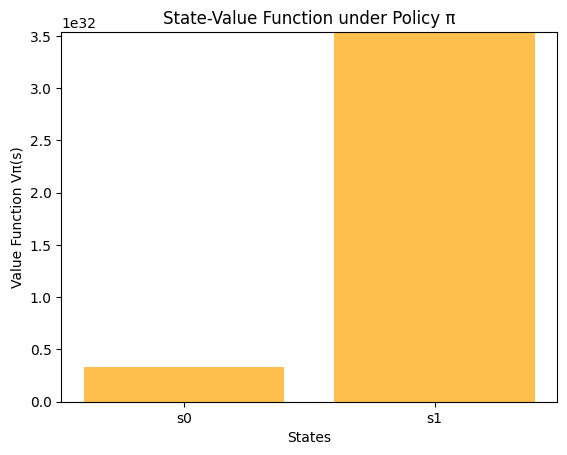

In [6]:
import matplotlib.pyplot as plt

def plot_value_function(mdp_instance, policy):
    states = list(policy.keys())
    values = [mdp_instance.value_function(state, policy) for state in states]

    plt.bar(states, values, color='orange', alpha=0.7)
    plt.xlabel('States')
    plt.ylabel('Value Function Vπ(s)')
    plt.title('State-Value Function under Policy π')
    plt.ylim(0, max(values) + 1)
    plt.show()

# Example usage
plot_value_function(mdp_value_function, policy)
